In [1]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

Datos recopilas de curso GEO202, 2024-2, Son datos publicos, principalmente los del censo, pero se recopiló desde dicho ramo por comodidad de acceso y haber sido datos con los que se trabajó previamente(arcGIS)

In [32]:
output_folder = os.path.join("Datos")
os.makedirs(output_folder, exist_ok=True)

gdf_list = []
input_folders = ["Datos-2024/CapasVarias", "Datos-2024/Ejercicio"]
for folder in input_folders:
    for filename in os.listdir(folder):
        if filename.endswith(".shp"):
            shp_path = os.path.join(folder, filename)
            layer_name = os.path.splitext(filename)[0]

            gdf = gpd.read_file(shp_path)

            if gdf.crs is not None and gdf.crs.to_epsg() != 4326:
                gdf = gdf.to_crs(epsg=4326)

            output_path = os.path.join(output_folder, f"{layer_name}.gpkg")
            gdf.to_file(output_path, driver="GPKG")
            print(f"Convertido: {filename} -> {output_path}")

Convertido: Areas_Verdes.shp -> Datos\Areas_Verdes.gpkg
Convertido: Comercio.shp -> Datos\Comercio.gpkg
Convertido: Ejes.shp -> Datos\Ejes.gpkg
Convertido: LimiteComunal.shp -> Datos\LimiteComunal.gpkg
Convertido: Manzanas_2002.shp -> Datos\Manzanas_2002.gpkg
Convertido: Manzanas_2017.shp -> Datos\Manzanas_2017.gpkg
Convertido: Paraderos.shp -> Datos\Paraderos.gpkg
Convertido: Poblacion.shp -> Datos\Poblacion.gpkg
Convertido: Predios.shp -> Datos\Predios.gpkg
Convertido: Bomberos.shp -> Datos\Bomberos.gpkg
Convertido: Censo_2017.shp -> Datos\Censo_2017.gpkg
Convertido: Curvas.shp -> Datos\Curvas.gpkg
Convertido: Ejes.shp -> Datos\Ejes.gpkg
Convertido: Est_Salud_Primaria.shp -> Datos\Est_Salud_Primaria.gpkg
Convertido: Limite_Comunal.shp -> Datos\Limite_Comunal.gpkg


In [33]:
stgo = gpd.read_file("Datos/santiago_urbano.gpkg")

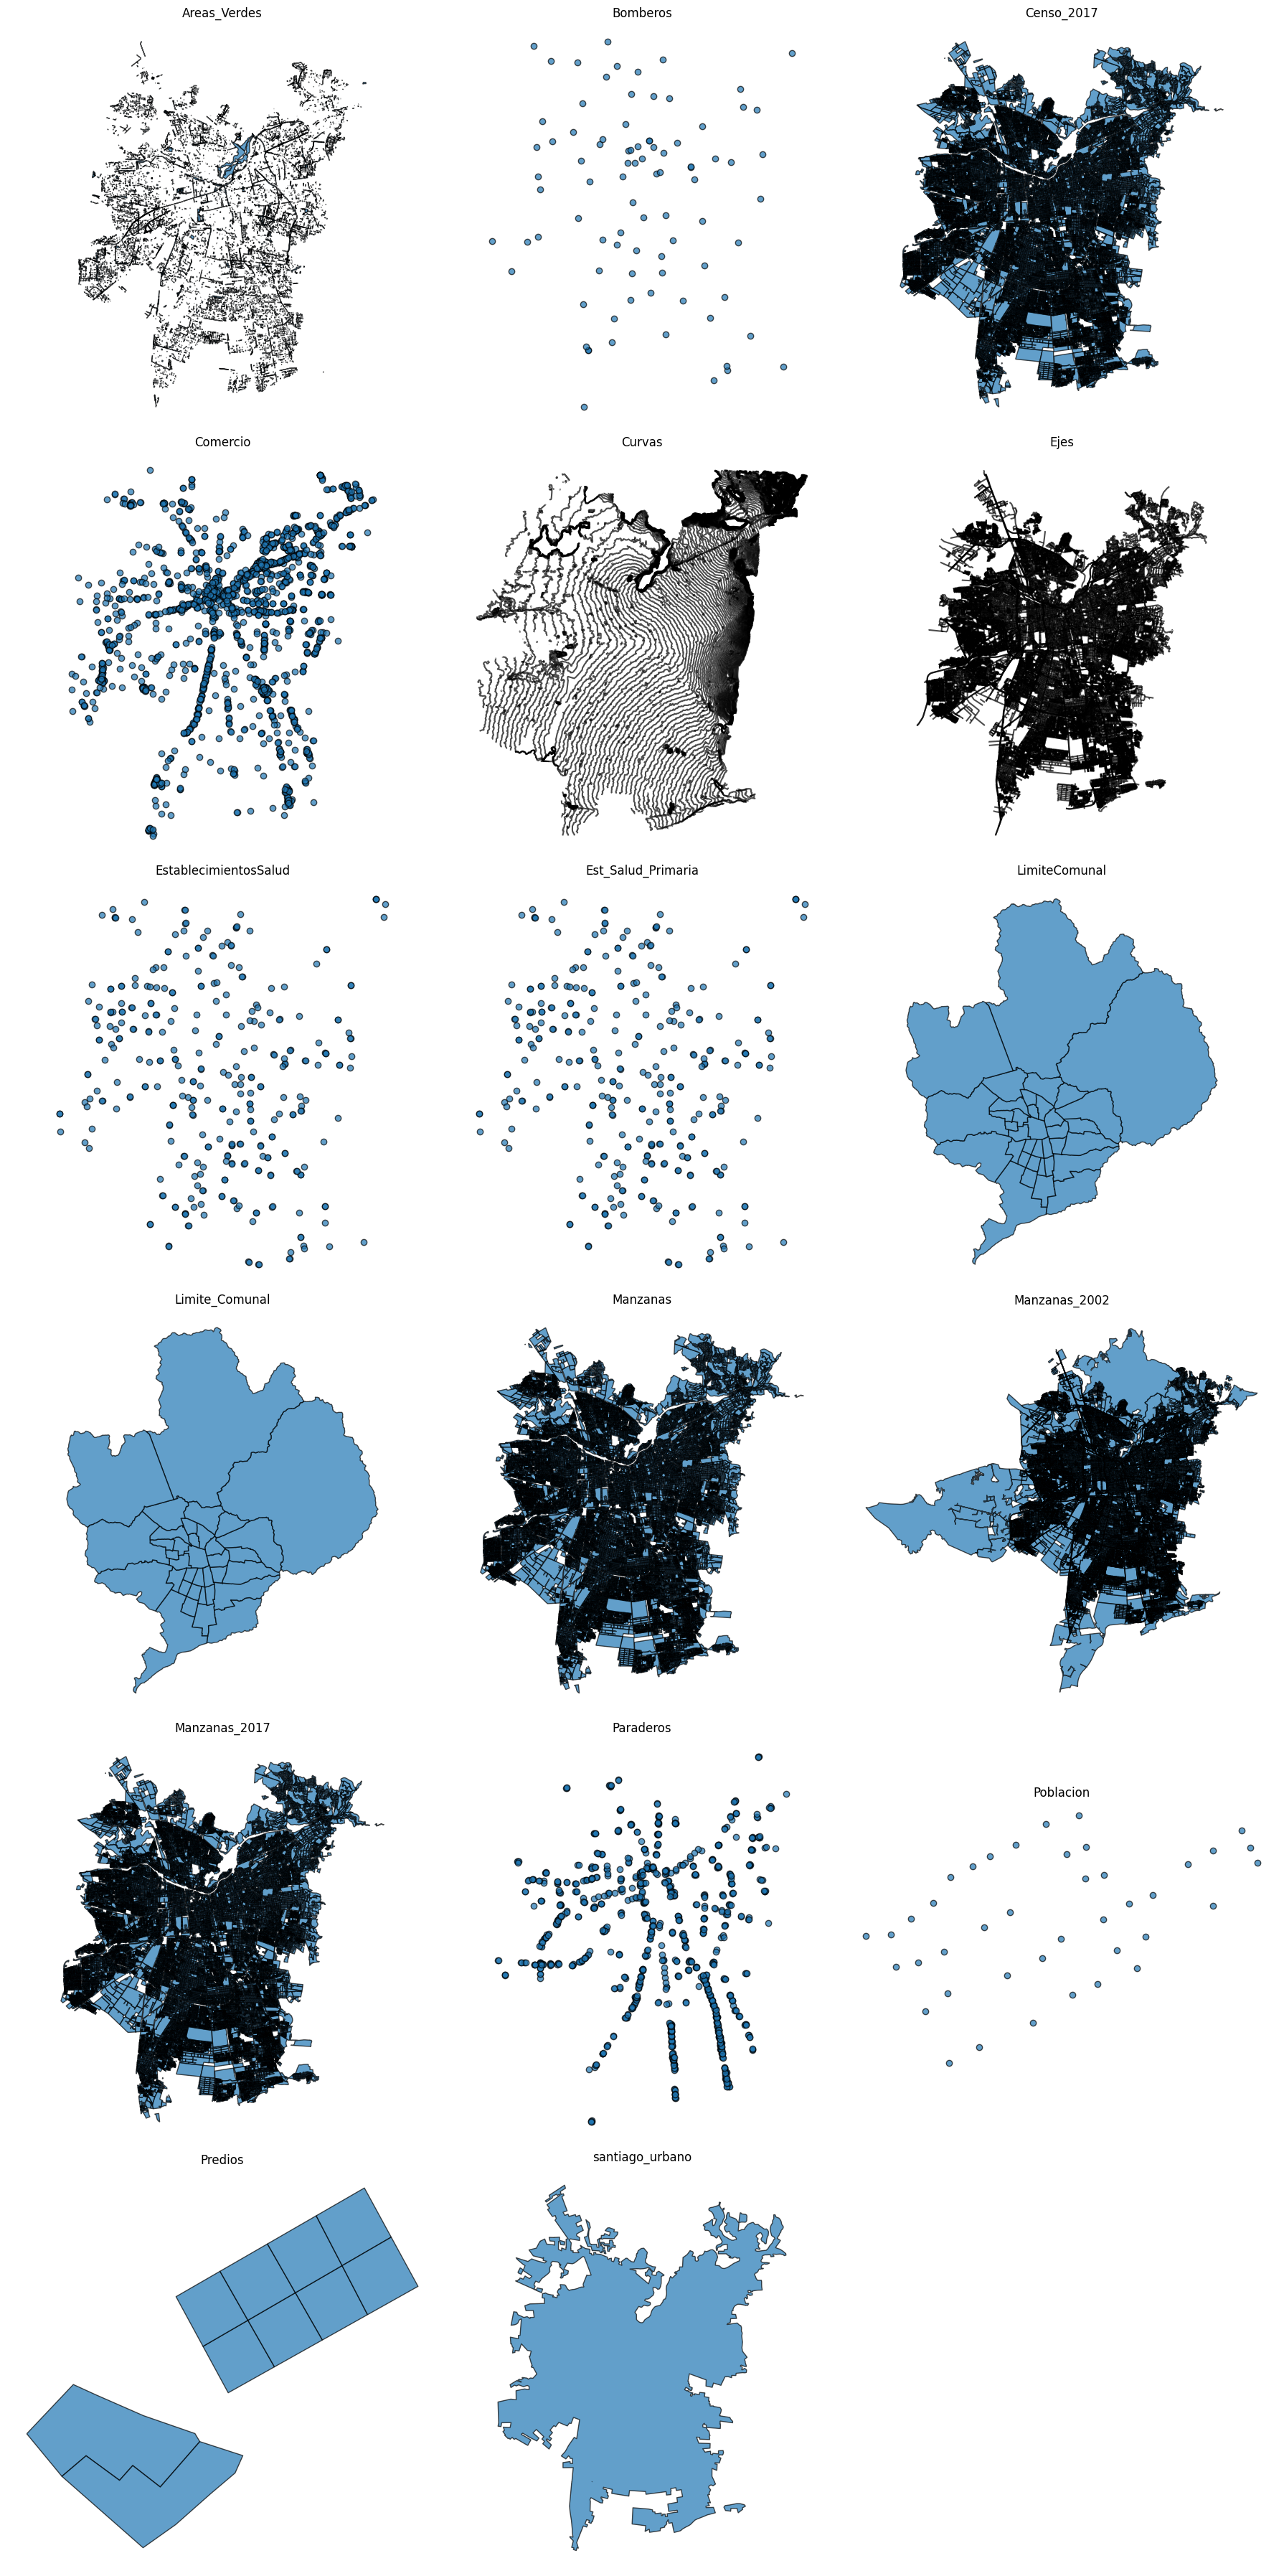

In [34]:
archivos = [f for f in os.listdir("Datos")]

gdfs = {}

for archivo in archivos:
    nombre = os.path.splitext(archivo)[0]
    gdf = gpd.read_file(os.path.join("Datos", archivo))

    gdf = gdf[gdf.geometry.intersects(stgo.geometry.iloc[0])]
    gdfs[nombre] = gdf


n = len(gdfs)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))

for ax, (nombre, gdf) in zip(axes.flat, gdfs.items()):
    gdf.plot(ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(nombre)
    ax.axis('off')

# Oculta los ejes vacíos si hay
for i in range(n, rows * cols):
    axes.flat[i].axis('off')

plt.tight_layout()
plt.show()

In [35]:
for key in ['Manzanas_2002', 'Manzanas_2017', 'Predios', 'datosZonas_Stgo_C2017', 'LimiteComunal', 'Curvas', 'Poblacion', 'Est_Salud_Primaria']:
    gdfs.pop(key, None)
    archivo_gpkg = f"{key}.gpkg"
    archivo_path = os.path.join(output_folder, archivo_gpkg)
    if archivo_gpkg in archivos:
        archivos.remove(archivo_gpkg)
    if os.path.exists(archivo_path):
        os.remove(archivo_path)


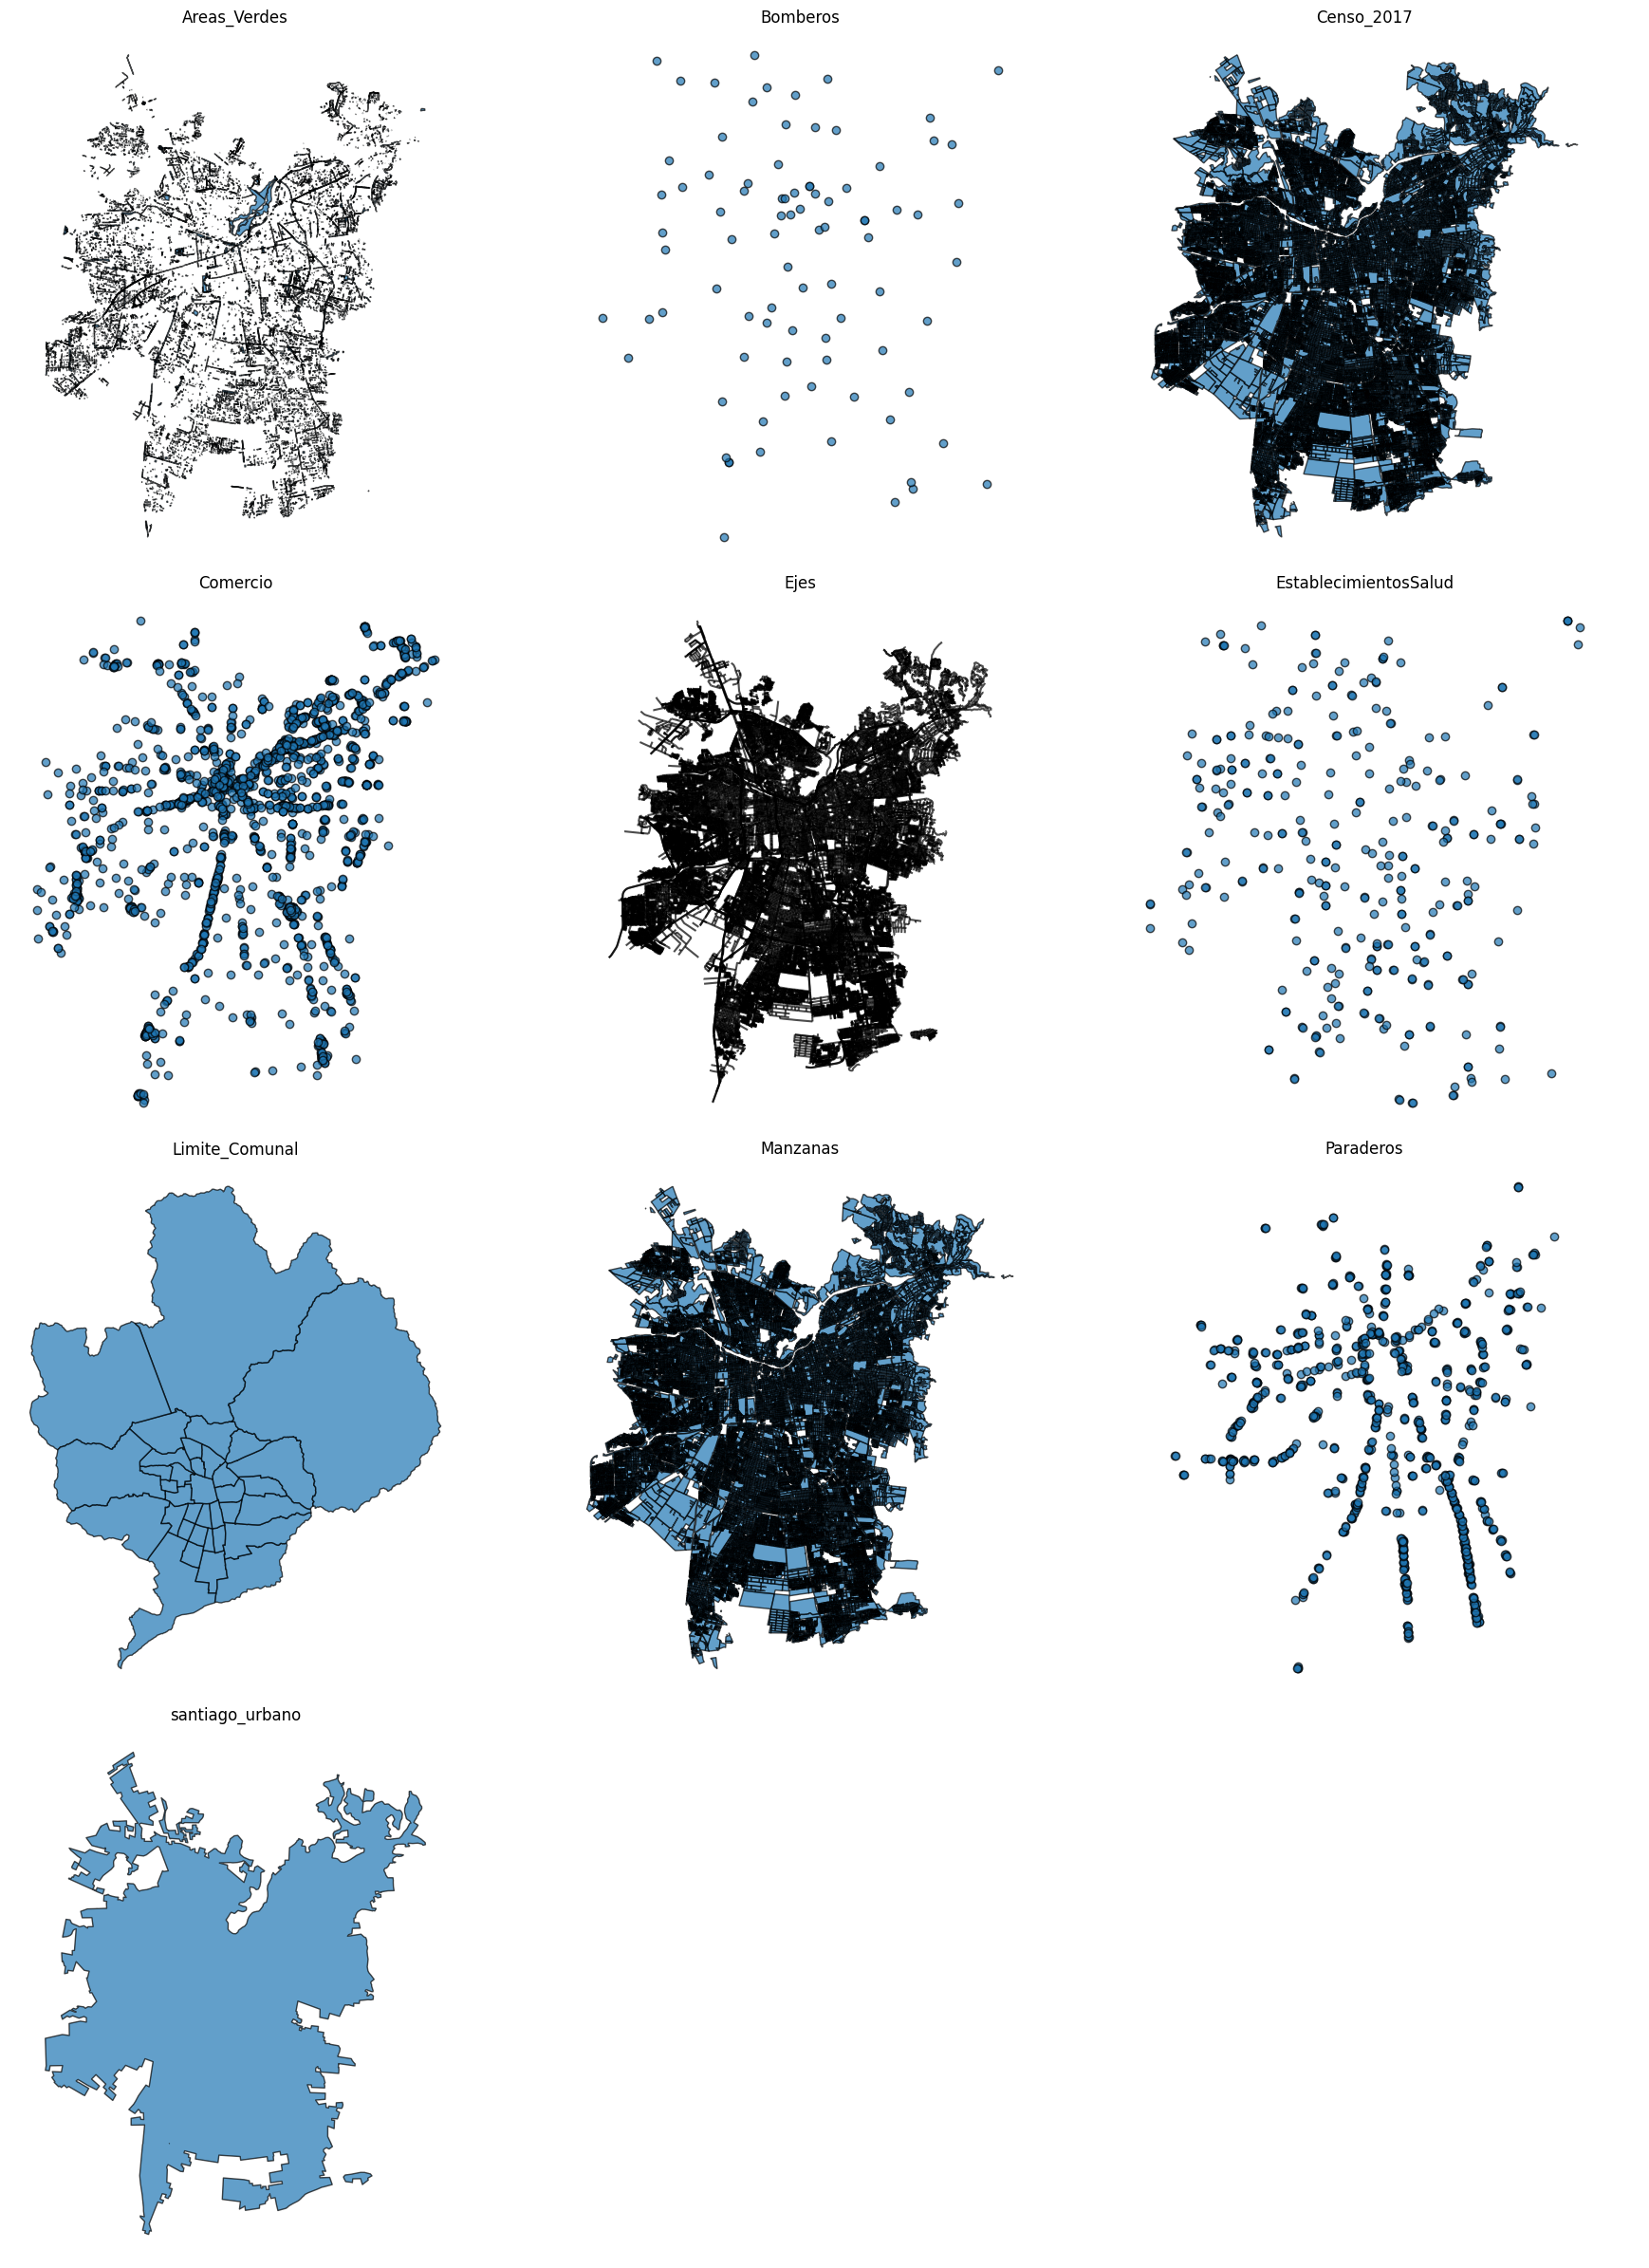

In [36]:
archivos = [f for f in os.listdir("Datos")]

gdfs = {}

for archivo in archivos:
    nombre = os.path.splitext(archivo)[0]
    gdf = gpd.read_file(os.path.join("Datos", archivo))

    gdf = gdf[gdf.geometry.intersects(stgo.geometry.iloc[0])]
    gdfs[nombre] = gdf


n = len(gdfs)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))

for ax, (nombre, gdf) in zip(axes.flat, gdfs.items()):
    gdf.plot(ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(nombre)
    ax.axis('off')

# Oculta los ejes vacíos si hay
for i in range(n, rows * cols):
    axes.flat[i].axis('off')

plt.tight_layout()
plt.show()

In [37]:
gdfs['Censo_2017']['DES_COMU'].unique()

array(['MAIPÚ', 'ESTACIÓN CENTRAL', 'LAS CONDES', 'LO BARNECHEA',
       'HUECHURABA', 'VITACURA', 'LA REINA', 'ÑUÑOA', 'RECOLETA',
       'PROVIDENCIA', 'PUDAHUEL', 'QUILICURA', 'INDEPENDENCIA', 'RENCA',
       'CONCHALÍ', 'CERRO NAVIA', 'QUINTA NORMAL', 'SANTIAGO', 'LO PRADO',
       'SAN JOAQUÍN', 'LAMPA', 'PEÑALOLÉN', 'LO ESPEJO', 'CERRILLOS',
       'EL BOSQUE', 'LA CISTERNA', 'PEDRO AGUIRRE CERDA', 'SAN MIGUEL',
       'LA PINTANA', 'SAN RAMÓN', 'LA FLORIDA', 'LA GRANJA', 'MACUL',
       'PUENTE ALTO', 'SAN BERNARDO'], dtype=object)

In [ ]:
# Recuperado de Repositorio https://github.com/skantos/metro-de-santiago-de-chile
df_tramos = pd.read_excel("Datos/plantilla_metro.xlsx", decimal=",")
df_tramos.to_csv("Datos/plantilla_metro.csv", index=False)